In [1]:
from IPython.core.display import display,HTML

In [2]:
HTML('''<script>
    hideInput = () => $('div.input').hide();
</script>
<body onload="javascript:hideInput()"></body>''')

In [3]:
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

# Assignment 3 - Part 2

Link to questions - [here](https://docs.google.com/document/d/1enoohnv9pHCYb3EJJ4colU6zWlfxf8sciVJr3_mBYxg/edit?usp=sharing)

***Student Details:***

- Name : Anjishnu Mukherjee
- Registration Number : B05-511017020
- Class Roll Number : CS Gy-70
- Exam Roll Number : 510517086
- Email : 511017020.anjishnu@students.iiests.ac.in

# Project Setup

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Load libraries, set seed

In [ ]:
%%capture
import platform
import random
import os
import sys
from collections import OrderedDict  
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def get_lib_versions():
  print("------------------------------------")
  output = OrderedDict()
  output["OS"] = platform.platform()
  output["Python version"] = sys.version.replace("\n", " ")
  output["Numpy version"] = np.version.full_version
  output["Pandas version"] = pd.__version__
  output["Matplotlib version"] = matplotlib.__version__
  output["Seaborn version"] = sns.__version__
  output["Scikitlearn version"] = sklearn.__version__
  for kv in output.items():
    print("%s: %s" % kv)
  print("------------------------------------")

def fix_seeds(seed=1337):
  SEED = seed
  random.seed(SEED)
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  plt.rcParams['figure.figsize'] = (7.0, 7.0) 
  plt.rcParams['figure.dpi'] = 90  
  sns.set_style("dark")
  sns.set_context("paper")
  sns.set_palette("colorblind")
  print("Global Seed : ", SEED)
  print("------------------------------------")

def Classification(model, clf_name, print_result):
    random_state = np.random.RandomState(5)

    # train the model
    model.fit(X_train, y_train)   

    # calculate accuracy scores
    score_train, score_test = model.score(X_train, y_train)*100, model.score(X_test, y_test)*100

    # get predictions on Test-set
    y_pred = model.predict(X_test)

    # confusion matrix 
    cm = confusion_matrix(y_test, y_pred)

    # classification report
    cr = classification_report(y_test, y_pred)

    if print_result:
        # Calculating the accuracies
        print('--- '+clf_name+' ---')

        # Print confusion matrix
        plt.rcParams['figure.figsize'] = (4, 4)
        sns.heatmap(cm, annot = True)
        plt.title('Confusion Matrix', fontsize = 14)
        plt.show()
        print(cr)
        print("------------------------------------------------")
        print('Training accuracy: %.2f [%%] \nTest accuracy :     %.2f [%%]\n'%(score_train, score_test))       
    return model, cr

In [ ]:
print("Environment Information : ")
get_lib_versions()
fix_seeds(5 )

Environment Information : 
------------------------------------
OS: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
Numpy version: 1.18.5
Pandas version: 1.0.5
Matplotlib version: 3.2.2
Seaborn version: 0.10.1
Scikitlearn version: 0.22.2.post1
------------------------------------
Global Seed :  5
------------------------------------


# Forest Cover Type dataset

[Link for Data](https://www.kaggle.com/uciml/forest-cover-type-dataset)

In [ ]:
file_path = '/content/drive/My Drive/ML_LAB/Assign_3/forest_cover_type/' 
data_path = file_path + 'data.csv'

### Read dataset into Pandas dataframe

In [ ]:
data = pd.read_csv(data_path)
print("Let's visualise the first 5 rows of the dataset.")
data.head() 

Let's visualise the first 5 rows of the dataset.


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
print('Data Dimensions:','Rows(Records):', data.shape[0],'Columns(Features):', data.shape[1])

Data Dimensions: Rows(Records): 581012 Columns(Features): 55


Data information:

- ```Elevation``` = Height in meters.
- ```Aspect``` = Aspect in degrees azimuth.
- ```Slope``` = Slope in degrees.
- ```Horizontal_Distance_To_Hydrology``` = Horizontal distance to nearest surface water features.
- ```Vertical_Distance_To_Hydrology``` = Vertical distance to nearest surface water features.
- ```Horizontal_Distance_To_Roadways``` = Horizontal distance to nearest roadway.
- ```Hillshade_9am``` = Hill shade index at 9am, summer equinox. Value out of 255.
- ```Hillshade_Noon``` = Hill shade index at noon, summer equinox. Value out of 255.
- ```Hillshade_3pm``` = Hill shade index at 3pm, summer equinox. Value out of 255.
- ```Horizontal_Distance_To_Fire_Point``` = Horizontal distance to nearest wildfire ignition points.
- ```Wilderness_Area1``` = Rawah Wilderness Area
- ```Wilderness_Area2``` = Neota Wilderness Area
- ```Wilderness_Area3``` = Comanche Peak Wilderness Area
- ```Wilderness_Area4``` = Cache la Poudre Wilderness Area
- ```Soil_Type1 to Soil_Type40``` = Type of the soil.
- ```Cover_TypeForest``` = Cover type, integer value between 1 and 7, with the following key:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

### Explore features to decide which ones to drop (EDA)

```python
features = data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
wilderness = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']
soiltype = data.loc[:,'Soil_Type1':'Soil_Type40']
```

In [ ]:
features = data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
wilderness = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']
soiltype = data.loc[:,'Soil_Type1':'Soil_Type40']

#### Correlation map of features

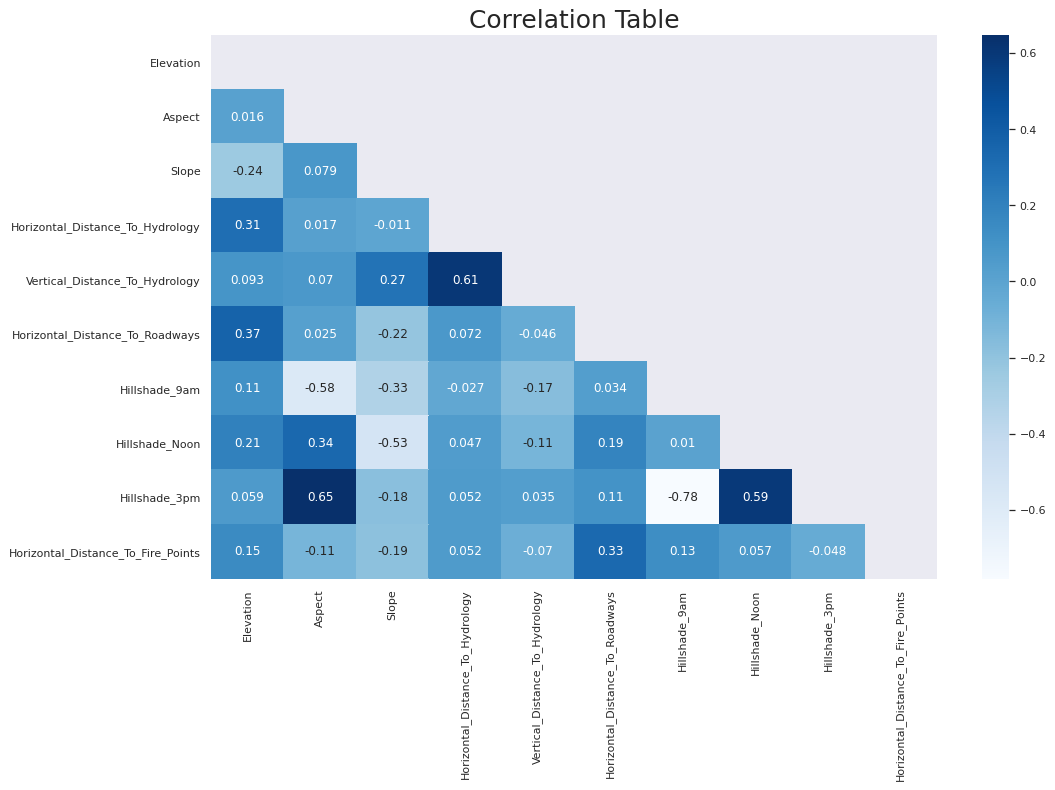

In [ ]:
mask = np.zeros_like(features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,8))
plt.title('Correlation Table', fontsize=20)
_ = sns.heatmap(features.corr(),mask=mask,cmap='Blues',linecolor='white',annot=True)

- ```Hillshade_3pm``` has very small negative correlation with ```Horizontal_Distance_To_Fire_Points```. So, if we drop it, it shouldn't affect the model's predicting power by much.

- Also, none of the correlation values are greater than 0.7, so there is no need to drop the other features as they aren't highly correlated.

#### Count plot of Soil types

In [ ]:
def rev_code(row):
    for c in soiltype.columns:
        if row[c] == 1:
            return c  

cover_soil_type = pd.DataFrame()
cover_soil_type['Cover_Type'] = data['Cover_Type']
cover_soil_type['Soil_Type'] = soiltype.apply(rev_code, axis=1)

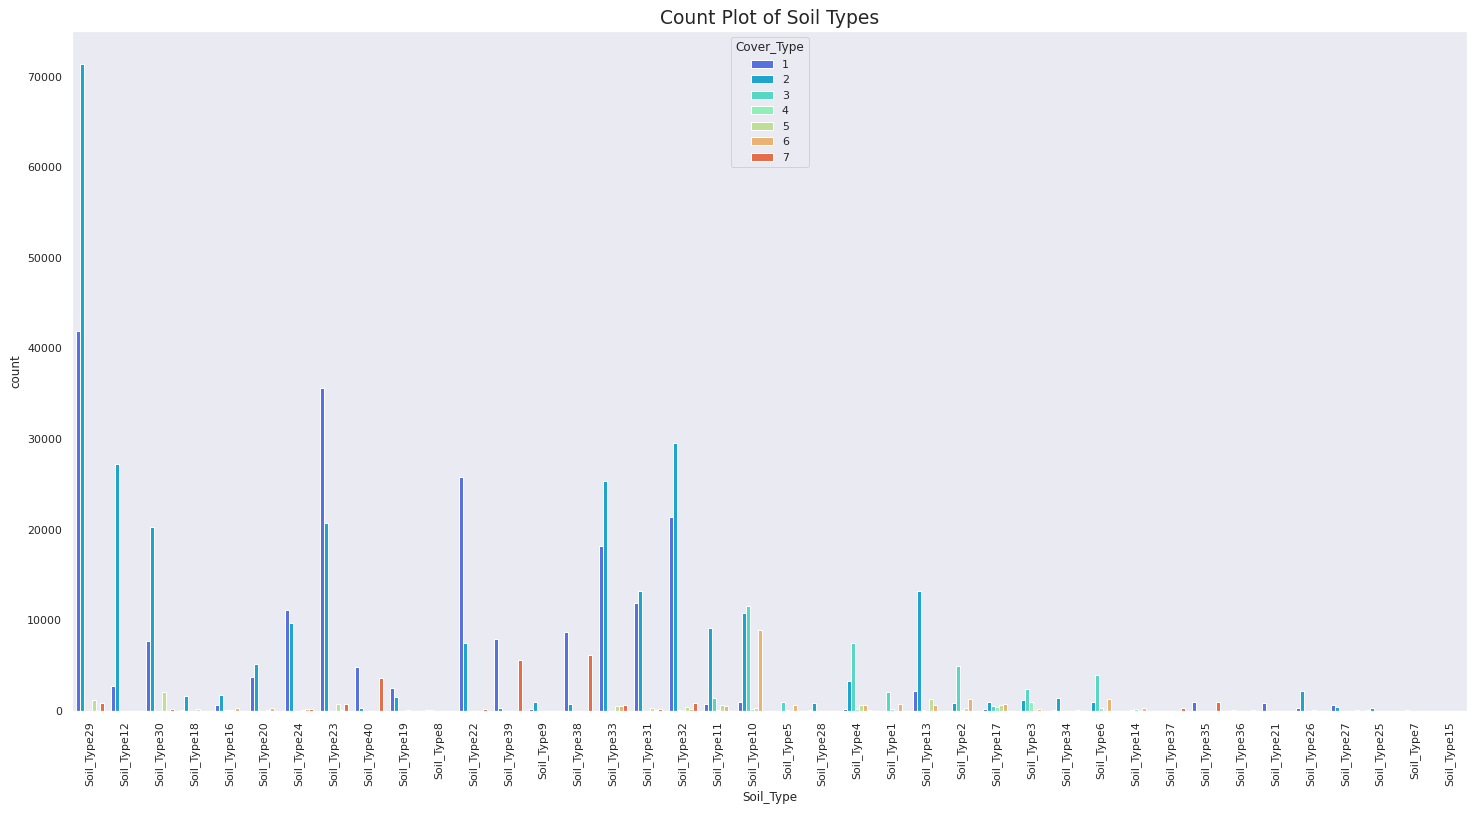

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=cover_soil_type, palette="rainbow")
plt.xticks(rotation=90)
_ =plt.title('Count Plot of Soil Types',fontsize=15)

The following Soil Types have very low counts :
- ```Soil_Type18```
- ```Soil_Type16```
- ```Soil_Type23```
- ```Soil_Type8```
- ```Soil_Type5```
- ```Soil_Type28```
- ```Soil_Type1```
- ```Soil_Type17```
- ```Soil_Type3```
- ```Soil_Type34```
- ```Soil_Type14```
- ```Soil_Type37```
- ```Soil_Type35```
- ```Soil_Type36```
- ```Soil_Type21```
- ```Soil_Type26```
- ```Soil_Type27```
- ```Soil_Type25```
- ```Soil_Type7```
- ```Soil_Type15```

I will be dropping these to reduce computation, as these won't be too signigificant for the analysis anyway.

#### Count plot of Wilderness types

In [ ]:
def rev_code(row):
    for c in wilderness.columns:
        if row[c] == 1:
            return c  

cover_wild_type = pd.DataFrame()
cover_wild_type['Cover_Type'] = data['Cover_Type']
cover_wild_type['Wilderness_Area'] = wilderness.apply(rev_code, axis=1)

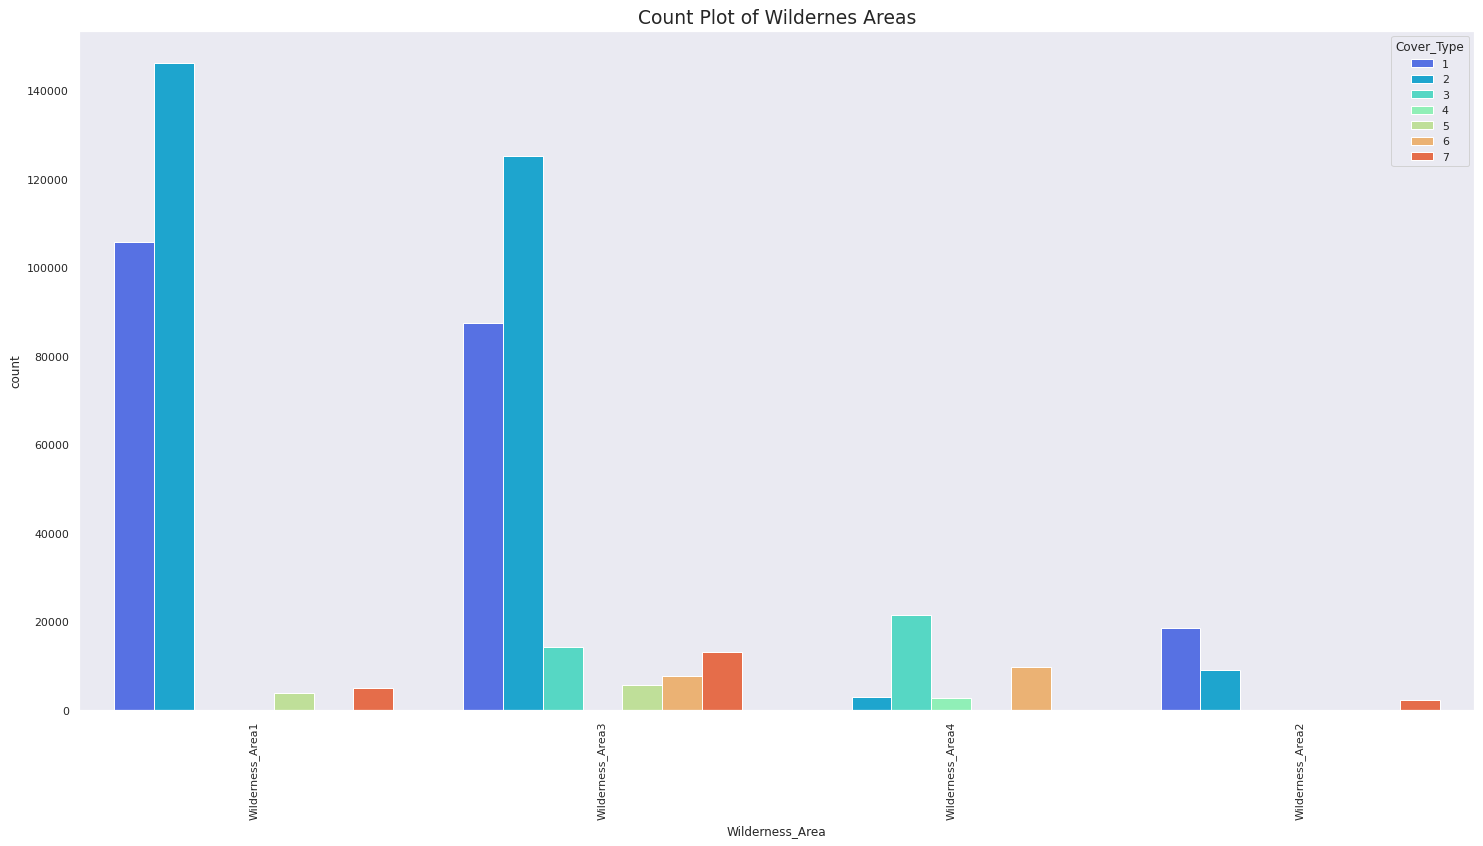

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Wilderness_Area', hue='Cover_Type',data=cover_wild_type, palette="rainbow")
plt.xticks(rotation=90)
_ = plt.title('Count Plot of Wildernes Areas',fontsize=15)

```Wilderness_Area2``` and ```Wilderness_Area4``` have very low counts and thus won't be too relevant for the analysis compared to the other types.

### Multi-class SVM using Linear Kernel

[SVM in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


#### Reduce the size first, otherwise it will take forever

In [ ]:
data_copy = data.copy()
data_copy = data_copy.head(1000)

#### Feature Selection

In [ ]:
%%capture
x = data_copy.loc[:,'Elevation':'Soil_Type40']
y = data_copy['Cover_Type']

# drop features based on analysis above
remove = ['Soil_Type18', 'Soil_Type16', 'Soil_Type23', 'Soil_Type8', 'Soil_Type5', 'Soil_Type28', 'Soil_Type1', 'Soil_Type17', 'Soil_Type3', 'Soil_Type34', 'Soil_Type14', 'Soil_Type37', 'Soil_Type35', 'Soil_Type36',
          'Soil_Type21', 'Soil_Type26', 'Soil_Type27', 'Soil_Type25', 'Soil_Type7', 'Soil_Type15', 'Wilderness_Area2', 'Wilderness_Area4', 'Hillshade_3pm']
          
x.drop(remove, axis=1, inplace=True)

#### Train:Test split

In [ ]:
# Train : test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print("------------------------------------")
print("The shapes of the different data : (n_samples,n_features)")
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("------------------------------------")

------------------------------------
The shapes of the different data : (n_samples,n_features)
x train:  (800, 31)
x test:  (200, 31)
y train:  (800,)
y test:  (200,)
------------------------------------


#### Train the Linear SVM for the multi-class problem

- 7 classes
- 1000 records
- 31 features 

--- clf1 - LogisticRegression, Liblinear solver, L2 penalty, One Versus Rest ---


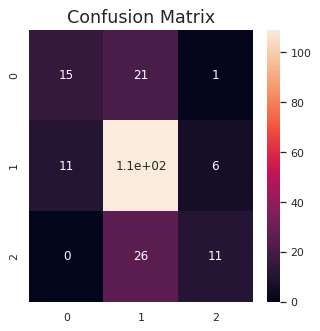

              precision    recall  f1-score   support

           1       0.58      0.41      0.48        37
           2       0.70      0.87      0.77       126
           5       0.61      0.30      0.40        37

    accuracy                           0.68       200
   macro avg       0.63      0.52      0.55       200
weighted avg       0.66      0.68      0.65       200

------------------------------------------------
Training accuracy: 68.62 [%] 
Test accuracy :     67.50 [%]



In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1)
name = 'clf1 - LogisticRegression, Liblinear solver, L2 penalty, One Versus Rest'
_, _ = Classification(svm_model_linear, name, True)

### Multi Class Logistic Regression - 2 features, 3 classes

[Logistic Regression in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

To  prevent RAM from being completely filled up, I am choosing 50 rows of data for each of the 3 classes.

In [ ]:
one = data.loc[data['Cover_Type'] == 1]
two = data.loc[data['Cover_Type'] == 2]
three = data.loc[data['Cover_Type'] == 3]

type_one = one.head(50)
type_two = two.head(50)
type_three = three.head(50)

reduced_data = pd.concat([type_one, type_two, type_three], axis=0)

# drop features based on analysis above
remove = ['Soil_Type18', 'Soil_Type16', 'Soil_Type23', 'Soil_Type8', 'Soil_Type5', 'Soil_Type28', 'Soil_Type1', 'Soil_Type17', 'Soil_Type3', 'Soil_Type34', 'Soil_Type14', 'Soil_Type37', 'Soil_Type35', 'Soil_Type36',
          'Soil_Type21', 'Soil_Type26', 'Soil_Type27', 'Soil_Type25', 'Soil_Type7', 'Soil_Type15', 'Wilderness_Area2', 'Wilderness_Area4', 'Hillshade_3pm']

reduced_data.drop(remove, axis=1, inplace=True)
reduced_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area3,Soil_Type2,Soil_Type4,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
40,2699,347,3,0,0,2096,213,234,6853,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
51,2739,323,25,85,43,3118,149,205,6219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
52,2696,72,2,30,0,3271,222,234,6071,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
55,2722,315,24,30,19,3216,148,212,6132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
67,2919,13,13,90,6,5321,207,214,4060,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
print('Data Dimensions:','Rows(Records):', reduced_data.shape[0],'Columns(Features):', reduced_data.shape[1])

Data Dimensions: Rows(Records): 150 Columns(Features): 32


In [ ]:
features = ['Elevation','Horizontal_Distance_To_Roadways']
classes = ['Cover_Type']
x = reduced_data[features]
y = reduced_data[classes]
y = y.Cover_Type.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
print("------------------------------------")
print("The shapes of the different data : (n_samples,n_features)")
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("------------------------------------")
logreg = LogisticRegression(C=1e5)
logreg.fit(x_train, y_train)
print("------------------------------------")

------------------------------------
The shapes of the different data : (n_samples,n_features)
x train:  (120, 2)
x test:  (30, 2)
y train:  (120,)
y test:  (30,)
------------------------------------
------------------------------------


#### Graph 1 : Training data 

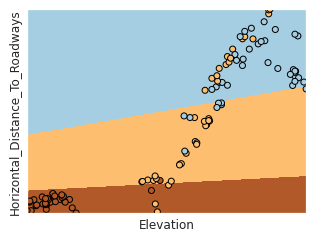

In [ ]:
# Plot the decision boundary for train data. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Roadways')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Graph 2 : Test data 

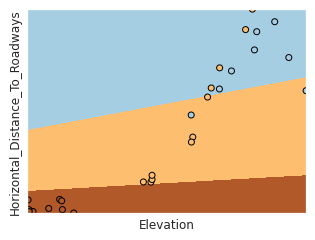

In [ ]:
# Plot the decision boundary for test data. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_test[:, 0].min() - .5, x_test[:, 0].max() + .5
y_min, y_max = x_test[:, 1].min() - .5, x_test[:, 1].max() + .5
h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Roadways')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()